<a href="https://colab.research.google.com/github/jcmachicao/gdmk__quantum_computation/blob/main/quantum_computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de Computación Cuántica para la Evaluación Permanente de una Mano de Cartas

## Version 1

Best hand found (more aces preferred): ['10', 'A', '10', '12']


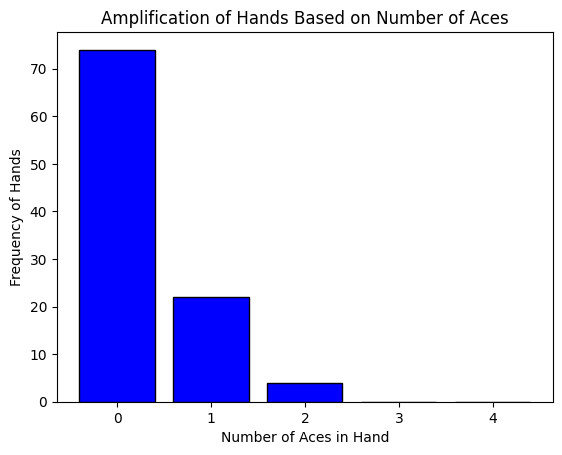

In [2]:
import random
import matplotlib.pyplot as plt

# Step 1: Define the deck (simplified to numbers, but Aces are marked)
deck = ["A", "A", "A", "A"] + [str(i) for i in range(2, 14)] * 4

# Step 2: Simulate superposition by generating a random 4-card hand
def generate_hand():
    return random.sample(deck, 4)

# Step 3: Oracle function to detect aces
def oracle(hand):
    return sum(1 for card in hand if card == "A")  # Count aces

# Step 4: Apply Grover-like amplitude amplification
def amplify_hands(hands):
    weighted_hands = []
    ace_counts = []
    for hand in hands:
        ace_count = oracle(hand)
        ace_counts.append(ace_count)
        # More aces = higher probability (simulated by adding multiple copies)
        weighted_hands.extend([hand] * (2 ** ace_count))
    return weighted_hands, ace_counts

# Step 5: Simulate measurement by picking the most probable hand
def measure(weighted_hands):
    return random.choice(weighted_hands)

# Simulate multiple runs and track amplification
def grover_simulation(runs=10):
    all_hands = [generate_hand() for _ in range(runs)]
    amplified_hands, ace_counts = amplify_hands(all_hands)
    result = measure(amplified_hands)
    return result, ace_counts

# Run the simulation
runs = 100
best_hand, ace_counts = grover_simulation(runs)
print("Best hand found (more aces preferred):", best_hand)

# Visualization of amplification process
plt.hist(ace_counts, bins=[0, 1, 2, 3, 4, 5], align='left', rwidth=0.8, color='blue', edgecolor='black')
plt.xticks(range(5))
plt.xlabel("Number of Aces in Hand")
plt.ylabel("Frequency of Hands")
plt.title("Amplification of Hands Based on Number of Aces")
plt.show()

## Version 2

In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
# Step 1: Define the deck (simplified to numbers, but Aces are marked)
deck = ["A", "A", "A", "A"] + [str(i) for i in range(2, 14)] * 4

In [3]:
# Step 2: Simulate superposition by generating a random 4-card hand
def generate_hand():
    return random.sample(deck, 4)

# Step 3: Oracle function to detect aces
def oracle(hand):
    return sum(1 for card in hand if card == "A")  # Count aces

# Step 4: Apply Grover-like amplitude amplification
def amplify_hands(hands):
    weighted_hands = []
    ace_counts = []
    for hand in hands:
        ace_count = oracle(hand)
        ace_counts.append(ace_count)
        # More aces = higher probability (simulated by adding multiple copies)
        weighted_hands.extend([hand] * (2 ** ace_count))
    return weighted_hands, ace_counts

In [4]:
# Step 5: Simulate measurement by picking the most probable hand
def measure(weighted_hands):
    return random.choice(weighted_hands)

# Simulate multiple runs and track amplification
def grover_simulation(runs=10):
    all_hands = [generate_hand() for _ in range(runs)]
    amplified_hands, ace_counts = amplify_hands(all_hands)
    result = measure(amplified_hands)
    return result, ace_counts

In [8]:
# Run the simulation for two cities
runs = 200
best_hand_city1, ace_counts_city1 = grover_simulation(runs)
best_hand_city2, ace_counts_city2 = grover_simulation(runs)

print("Best hand found in City 1 (more aces preferred):", best_hand_city1)
print("Best hand found in City 2 (more aces preferred):", best_hand_city2)

Best hand found in City 1 (more aces preferred): ['11', '2', '12', 'A']
Best hand found in City 2 (more aces preferred): ['3', '10', 'A', '6']


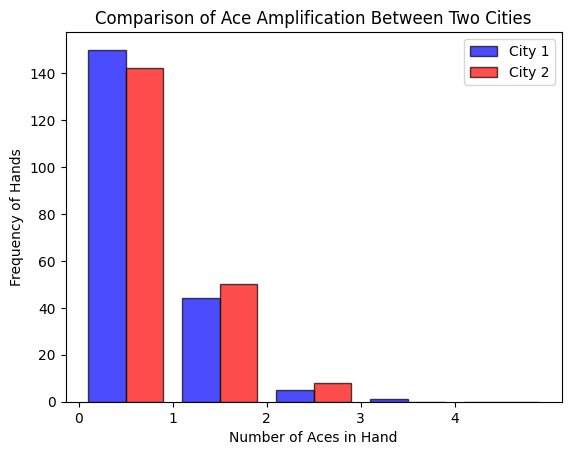

In [9]:
# Visualization of amplification process for both cities
plt.hist([ace_counts_city1, ace_counts_city2], bins=[0, 1, 2, 3, 4, 5], align='mid', rwidth=0.8,
         color=['blue', 'red'], edgecolor='black', label=['City 1', 'City 2'], alpha=0.7)

plt.xticks(range(5))
plt.xlabel("Number of Aces in Hand")
plt.ylabel("Frequency of Hands")
plt.title("Comparison of Ace Amplification Between Two Cities")
plt.legend()
plt.show()